Problem 1

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from scipy.stats import norm
from scipy.stats import rayleigh
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

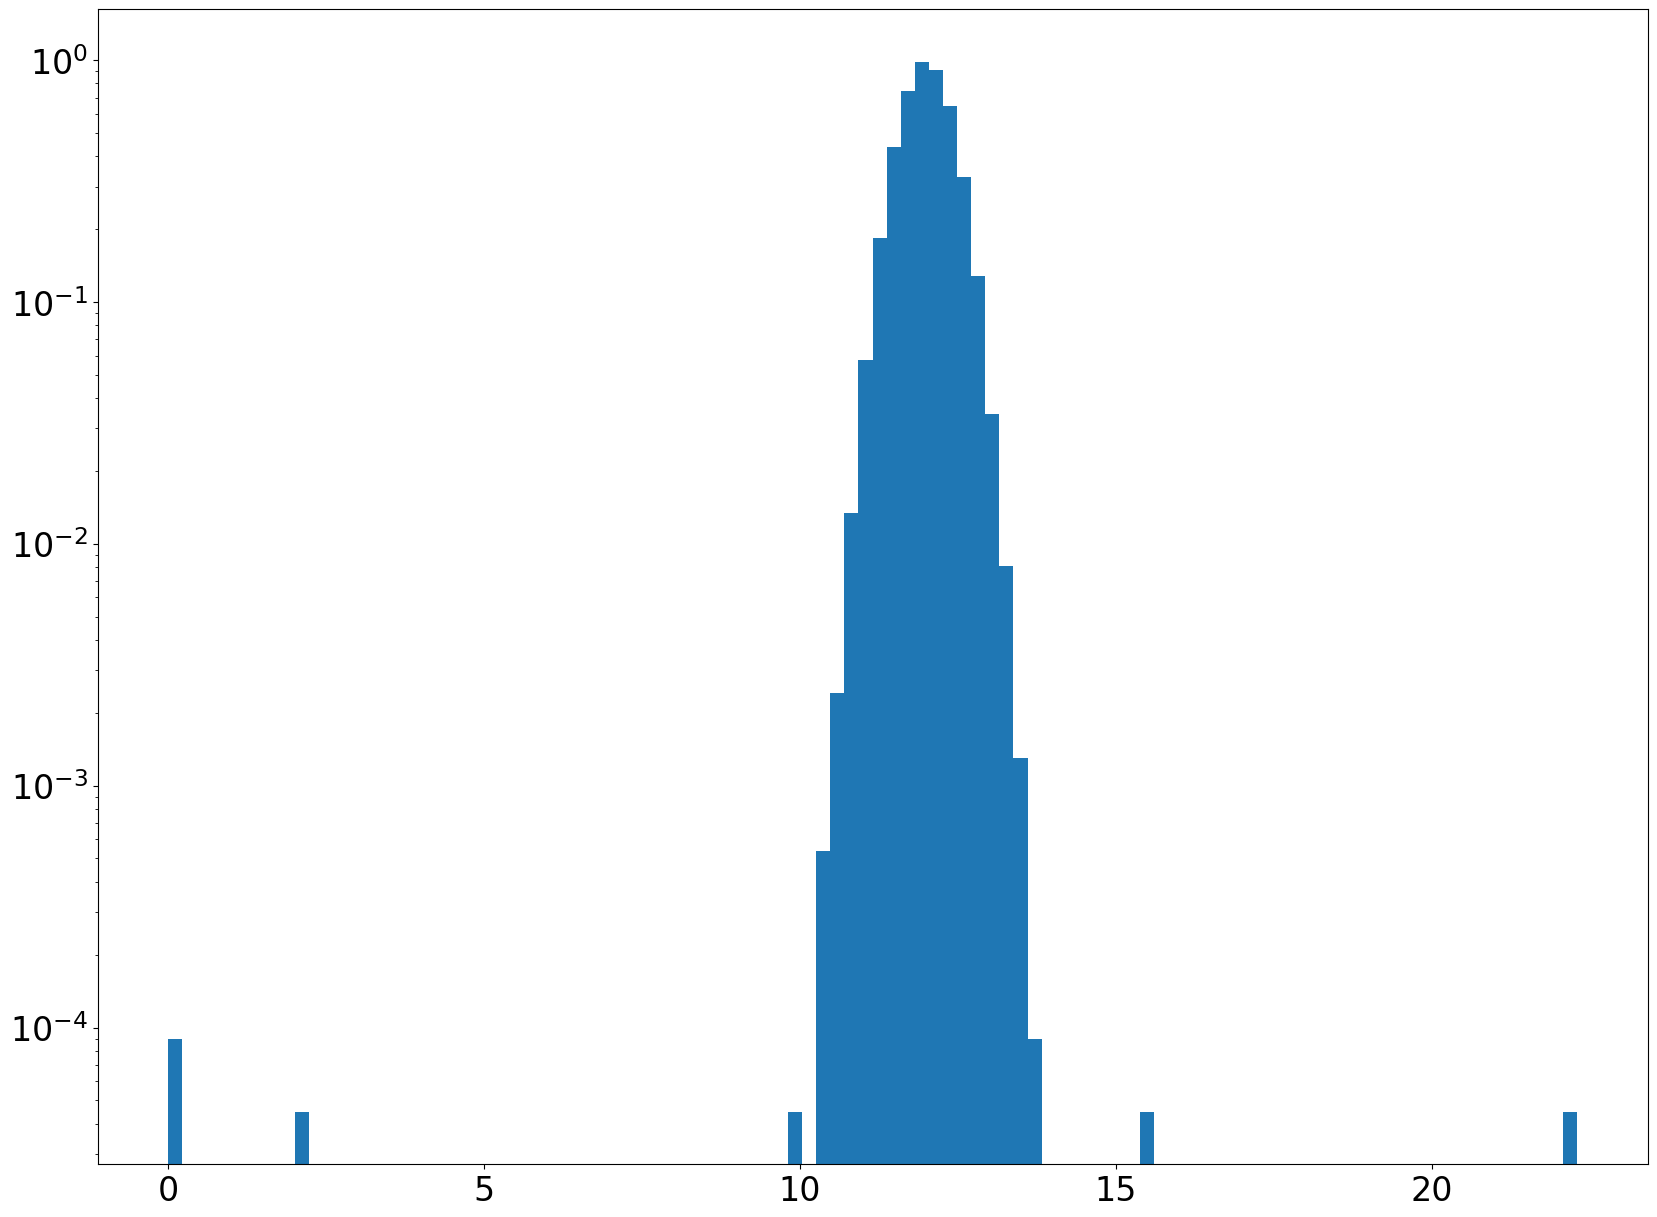

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

A.

Here, the goal is to identify bad data and throw it out. But we also want to know how much good data we have. We can do this by using a certain threshold. But, depending on the threshold, we might throw out good data and keep in some bad data. So, the statistical question we can ask is: using a specific sigma threshold, how much good data are we throwing out and how much bad data are we keeping in? This question will allows us to test the performance of a certain sigma value and increase or decrease it if needed.

Now the threshold I will use is 5σ, which has a probability of 1 in 3.5 million (1/3.5E6). We can use the ppf feature to convert this value into values in the gaussian distribution. From there we can use these values to determine which data points to leave in or throw out.

In [12]:
sig5prob = 1/3.5e6
leftside = norm.ppf(sig5prob,loc=12,scale=0.4)
rightside = norm.isf(sig5prob,loc=12,scale=0.4)
print(leftside)
print(rightside)

9.999747426038471
14.000252573961529


These are the bounds that we will use to keep data in. The bad data we are looking at is [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]. 3 of these points are kept in, 5 are thrown out. As for the good data, all of it is kept in (100,000).

In [5]:
data = {' ':  ['Your Test Good', 'Your Test Bad'],
        'True T': ['100000', '0'],
         'Bad T': ['3','5']
        }

df = pd.DataFrame(data)

print (df)

                   True T Bad T
0  Your Test Good  100000     3
1   Your Test Bad       0     5


B/C.

If the threshold I would have used is very small like less than one sigma, there would have been a lot of good data being thrown out, and the smaller the threshold, the more good data is thrown out. Bad data points are outliers so they are randomly distributed. The threshold that I used throws out most bad data (5) but leaves in 3 bad data points. let's what the effect of changing the threshold has on the data using 2σ:

In [14]:
#95.4% of data is within 2 sigma 
sig2prob = 1 - 0.954
leftside = norm.ppf(sig2prob,loc=12,scale=0.4)
rightside = norm.ppf(1-sig2prob,loc=12,scale=0.4)
print(leftside)
print(rightside)

11.326023692851233
12.673976307148767


These are the new bounds we will use. Looking at the bad data, only one bad data point is kept in and all the rest are thrown out. But good data is also thrown out. This makes sense because the distribution resembles a gaussian, so as the threshold is decreased, more and more of the good data is thrown out. This is not a predictable quantity because the distribution is not symmetric, so we cannot know how much good data is being thrown out by just looking at the distribution. As for the bad data, it is possible to thrown out all bad data if the threshold is small enough, however this would not be a worthwhile decision as it would also throw out much of the good data.

Problem 2

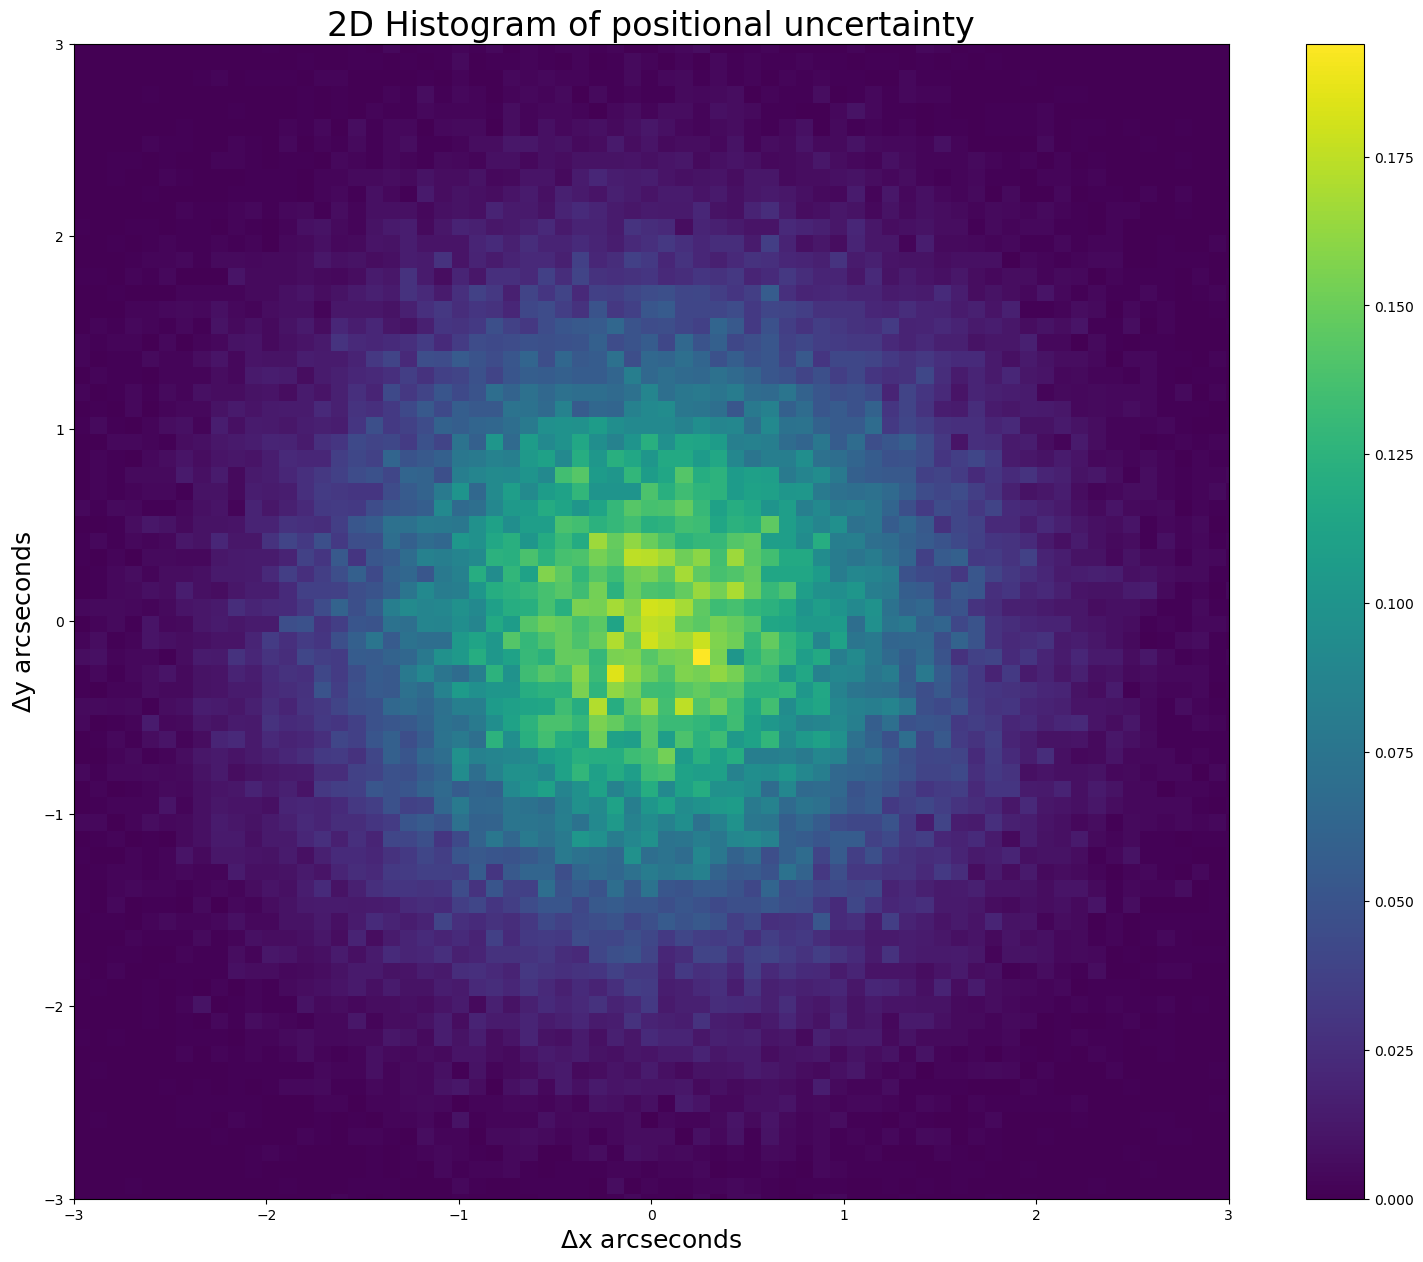

In [7]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

We need to be able to detect a potential asteroid with 5 sigma detection of movement. This is essentially just a 2 dimensional gaussian distribution so we can still use some of the same concepts. We want to translate 5 sigma into distance units in the plot (arcseconds). So the question we can ask is: What does 5 sigma translate to in arcseconds? Or, simply, where on the plot is the 5 sigma threshold? Now, in the one dimensional case, we had two boundaries. But in the 2 dimensional case, the boundary would be a full circle centered by the origin. 

Reading into the two dimensional normal distribution, the PDF of the vector length of a bivariate normally distributed vector is defined by the Rayleigh distribution. Put another way, the Rayleigh distribution is the magnitude of two independent normally distributed random variables. 

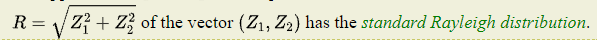

In [8]:
from IPython.display import Image
Image(filename='rayleigh_distribution.png')

Where Z1 and Z2 are the two normally distributed variables. So, let's plot this distribution.

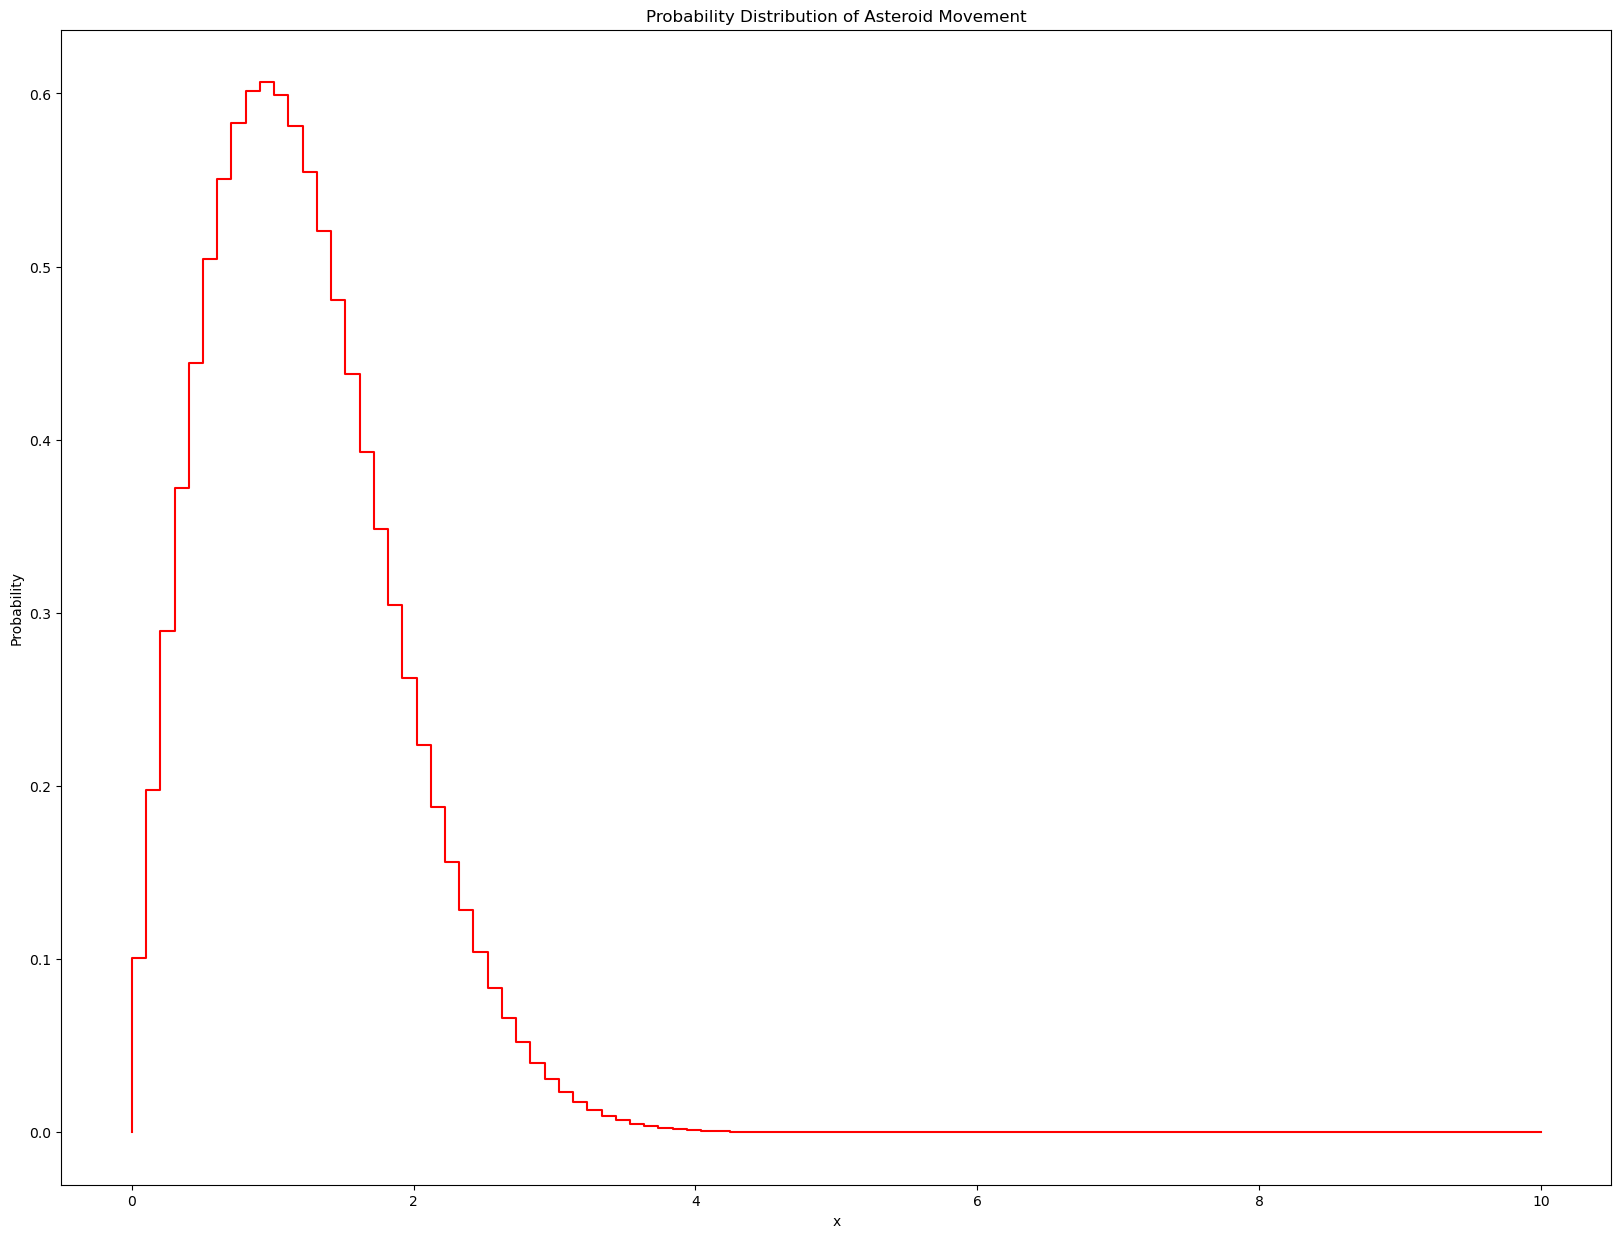

In [9]:
fig,ax = plt.subplots(1,1)
x = np.linspace(0,10,100)
dist = rayleigh.pdf(x)
ax.step(x,dist,color='red')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Probability Distribution of Asteroid Movement')
plt.show()

Next, we need to know how 5 sigma detection of motion translates to arcseconds: 

In [11]:
arcsec = rayleigh.ppf(1-sig5prob)
arcsec

5.489676406965609

So 5 sigma translates to a radius of ~5.49 arcseconds.

https://www.randomservices.org/random/special/Rayleigh.html
https://en.wikipedia.org/wiki/Multivariate_normal_distribution    

Problem 3

We observed 6800 cosmic rays over 15 days. In this case, we are able to observe the moon for 8 hours every night and would like to find out the significance of our moon shadow detection. Firstly, we need to understand that 6800 cosmic rays is the number we will use to find the sigma value but we don't have the background distribution yet. Let's find that out: 

Text(0.5, 1.0, 'Background Distribution of Cosmic Rays')

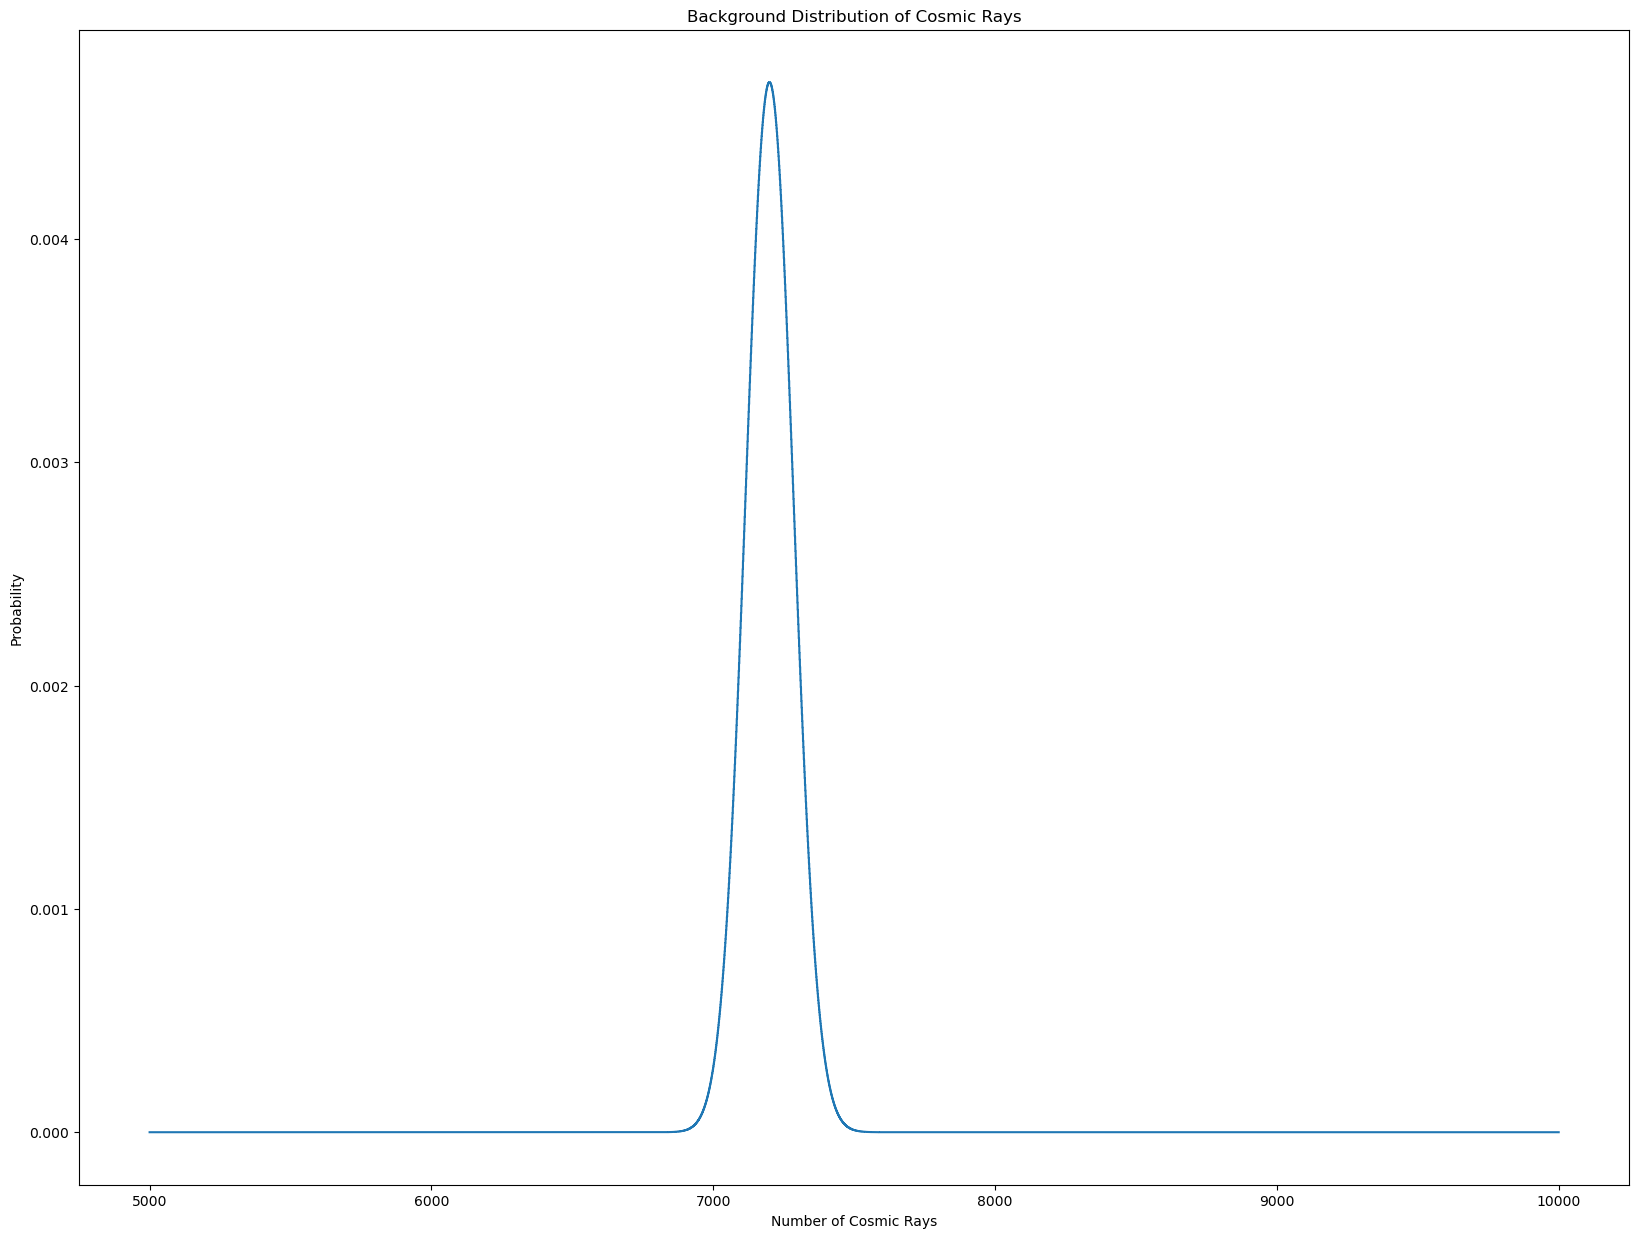

In [15]:
#1 cosmic ray/min. 60 cosmic rays/hours for 8 hours = 480
#so, over 15 days = 7200 total cosmic rays (mean)
#background of cosmic rays is given by poisson 
dist = poisson(7200)
x = np.arange(5000,10000)
pois = dist.pmf(x)
plt.step(x,pois)
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability')
plt.title('Background Distribution of Cosmic Rays')

This represents the cosmic ray background distribution. Since we need to know the significance of our moon shadow detection, we can ask the question: if the given background data follows a poisson distribution, what is the probability that we find a value that is less than or equal to 6800? i.e.signal-like or less.
This is the same process we have been doing all quarter, we can get the probability from the background distribution:

In [13]:
dist = poisson(7200)
probability = dist.cdf(6800)
probability

1.0133280183917768e-06

We can take this value and convert it into a sigma value using a normal distribution

In [14]:
sigma = norm.ppf(probability)
abs(sigma)

4.750747965777188

What I just did here is take the convolution of the two poisson distributions. This shifts the mean over to 7200.